In [1]:
from scipy.optimize import minimize
from scipy.optimize import fsolve
import numpy as np
from math import *

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def draw(lpointx,lpointy):
    label = 0
    for (pointx,pointy) in zip(lpointx,lpointy):
        norm = mpl.colors.Normalize(vmin=0, vmax=10)
        cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
        for i in range(len(pointx)-1):
            plt.plot([pointx[i],pointx[i+1]],[pointy[i],pointy[i+1]], label = str(i))#, color=cmap.to_rgba(i+1)
        label += 1
        plt.legend()
        plt.show()
def drawtime(pointx,pointy):
    label = 0
    colors = np.random.rand(100)
    marker = ["o", "v", "X", "^", "<", ">", "h", "s", "P", "p", "*", "+", "d"]
    for j in range(len(pointx[0])):
        for i in range(len(pointx)):
            plt.scatter(pointx[i][j],pointy[i][j],marker = marker[i], c = colors[j])
        label += 1
        plt.legend()
        plt.show()

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import *
import matplotlib.cm as cm
def draw(pointx,pointy, goal, obstacle):
    label = 0
    colors = np.random.rand(12)
    marker = ["o", "v", "X", "*", "^", "<", ">", "h", "s", "P", "p", "+", "d"]
    colors =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
    for j in range(len(pointx[0])-1):
        for i in range(len(pointx)):
            plt.scatter(pointx[i][j+1],pointy[i][j+1],marker = marker[i])
        for g in goal:
            circle1 = plt.Circle((g[0], g[1]), 1, fill = False, color='b')
            plt.gca().add_patch(circle1)
        for g in obstacle:
            circle1 = plt.Circle((g[0], g[1]), 1, fill = False, color='r')
            plt.gca().add_patch(circle1)
        plt.show()
def drawtime(pointx,pointy, goal, obstacle):
    label = 0
    colors = np.random.rand(12)
    marker = ["o", "v", "X", "*", "^", "<", ">", "h", "s", "P", "p", "+", "d"]
    colors =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
    clrs = [sns.color_palette(colors[i], len(pointx[0])) for i in range(len(pointx))]
    for j in range(len(pointx[0])-1):
        for i in range(len(pointx)):
            plt.scatter(pointx[i][j+1],pointy[i][j+1],marker = marker[i], c = clrs[i][j])
            #plt.plot([pointx[i][j],pointx[i][j+1]],[pointy[i][j],pointy[i][j+1]], c = clrs[i][j])
        label += 1
    for g in goal:
        circle1 = plt.Circle((g[0], g[1]), 0.51, fill = False, color='b')
        plt.gca().add_patch(circle1)
    for g in obstacle:
        circle1 = plt.Circle((g[0], g[1]), 0.5, fill = False, color='r')
        plt.gca().add_patch(circle1)
    plt.show()

In [ ]:
class centralized():
    def __init__(self):
        self.jMax = 15
        self.qx0 = np.array([0,10,0,10])
        self.qy0 = np.array([0,0,10,10])
        self.qxT = np.array([10,0,10,0])
        self.qyT = np.array([10,10,0,0])
        self.p = 1
        self.T = 1
        self.v = 1
        self.nAgent = 4
        self.y = np.zeros((self.nAgent,self.nAgent,self.jMax+2))
        self.l = np.ones((self.nAgent,self.jMax+2))
        self.qinit = np.ones((self.nAgent,2*self.jMax))
        self.q = np.copy(self.qinit).flatten()
        self.index = 0
    def Lp(self,  q):
        self.q = q
        qx, qy = self.convertTupleToArray(self.q)
        t1 = np.sum([np.sum([sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2) for j in range(self.jMax+2)]) for i in range(self.nAgent)])
        return t1
    def convertTupleToArray(self,q):
        qn = list(q)
        qy = []
        qx = []
        for i in range(len(qn)):
            if i%2 == 0:
                qx.append(qn[i])
            else:
                qy.append(qn[i])
        qx = np.reshape(np.array(qx), (self.nAgent, -1))
        qy = np.reshape(np.array(qy), (self.nAgent, -1))
        qx =  np.c_[ self.qx0, qx ] 
        qy =  np.c_[ self.qy0, qy ] 
        qx =  np.c_[ qx, self.qxT ] 
        qy =  np.c_[ qy, self.qyT ] 
        return qx, qy
    def equations(self,q):
        n = q[:self.nAgent*(self.jMax+2)]
        n = n.reshape((self.nAgent,(self.jMax+2)))
        q = q[self.nAgent*(self.jMax+2):]
        m = q[:self.nAgent*self.nAgent*(self.jMax+2)]
        m = m.reshape((self.nAgent,self.nAgent,(self.jMax+2)))
        q = q[self.nAgent*self.nAgent*(self.jMax+2):]
        qx, qy = self.convertTupleToArray(self.q)
        arr = ()
        ep = 0.0001
        for i in range(len(qx)):
            for j in range(len(qx[0])-1):
                for k in range(len(qx)):
                    norm2 = sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)
                    arr = arr + (m[i][k][j]*(self.T-norm2), )
                if j == 0:
                    arr = arr + (0, )
                    continue
                arr = arr + (n[i][j]*sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)-self.v, )
            arr = arr + (m[i][k][j]*(self.T-norm2), )
            for k in range(len(qx)):
                norm2 = sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)
                arr = arr + (m[i][k][j]*(self.T-norm2), )
        for i in range(len(qx)):
            for j in range(len(qx[0])-1):
                if j == 0:
                    continue
                eq1 = (qx[i][j]-qx[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+(qx[i][j]-qx[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                eq2 = (qy[i][j]-qy[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+(qy[i][j]-qy[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                eq3 = 0
                eq4 = 0
                for k in range(len(qx)):
                    if k == i:
                        continue
                    norm2 = sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)
                    eq3 += (-1*(self.y[i][k][j])*(qx[i][j]-qx[k][j])/(norm2+ep)) 
                    eq4 += (-1*(self.y[i][k][j])*(qy[i][j]-qy[k][j])/(norm2+ep))
                eq5 = self.l[i][j]*(qx[i][j]-qx[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+self.l[i][j+1]*(qx[i][j]-qx[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                eq6 = self.l[i][j]*(qy[i][j]-qy[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+self.l[i][j+1]*(qy[i][j]-qy[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                Lpx = eq1 + eq3 + eq5
                Lpy = eq2 + eq4 + eq6
                arr = arr + (Lpx, )
                arr = arr + (Lpy, )
        return list(arr)
    def main(self):
        self.q = fsolve(self.equations, list(np.ones(self.nAgent*self.nAgent*(self.jMax+2)+self.nAgent*(self.jMax+2)+self.nAgent*2*self.jMax)))
        self.q = self.q[self.nAgent*(self.jMax+2):]
        self.q = self.q[self.nAgent*self.nAgent*(self.jMax+2):]
        return self.q

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case i

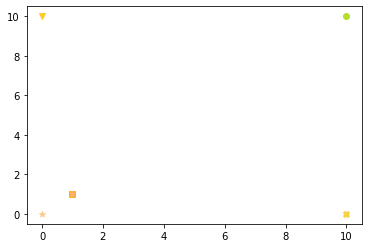

In [ ]:
c = centralized()
q = c.main()
qx, qy = c.convertTupleToArray(q)
drawtime(qx,qy,[],[])

In [ ]:
class ADMM():
    def __init__(self):
        self.jMax = 5
        self.qx0 = np.array([0,1,0,1])*3
        self.qy0 = np.array([0,0,1,1])*3
        self.qxT = np.array([1,0,1,0])*3
        self.qyT = np.array([1,1,0,0])*3
        self.p = 1
        self.T = 1
        self.v = 1
        self.nAgent = 4
        self.y = np.ones((self.nAgent,self.nAgent,self.jMax+2))
        self.l = np.ones((self.nAgent,self.jMax+2))
        self.qinit = np.ones((self.nAgent,2*self.jMax))*2
        self.q = np.copy(self.qinit)
        self.index = 0
    def convertTupleToArray(self, q):
        qy = []
        qx = []
        for qn in q:
            qnx = []
            qny = []
            for i in range(len(qn)):
                if i%2 == 0:
                    qnx.append(qn[i])
                else:
                    qny.append(qn[i])
            qx.append(qnx)
            qy.append(qny)
        qx =  np.c_[ self.qx0, qx ] 
        qy =  np.c_[ self.qy0, qy ] 
        qx =  np.c_[ qx, self.qxT ] 
        qy =  np.c_[ qy, self.qyT ] 
        return qx, qy
    def convertTupleToArrayi(self, qi):
        qn = list(qi)
        qy = [self.qx0[self.index]]
        qx = [self.qy0[self.index]]
        for i in range(len(qn)):
            if i%2 == 0:
                qx.append(qn[i])
            else:
                qy.append(qn[i])
        qx.append(self.qxT[self.index])
        qy.append(self.qyT[self.index]) 
        return qx, qy
    def equations(self, qi):
        qxi, qyi = self.convertTupleToArrayi(qi)
        qx, qy = self.convertTupleToArray(self.q)
        qx[self.index] = qxi
        qy[self.index] = qyi
        arr = ()
        ep = 0.0001
        if True:
            i = self.index + 0
            for j in range(len(qx[0])-1):
                if j == 0:
                    continue
                eq1 = (qx[i][j]-qx[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+(qx[i][j]-qx[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                eq2 = (qy[i][j]-qy[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+(qy[i][j]-qy[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                if j == len(qx[0])-2:
                    print(eq1,eq2)
                eq3 = 0
                eq4 = 0
                for k in range(len(qx)):
                    if k == i:
                        continue
                    norm2 = sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)
                    if T - norm2 > 0:
                        eq3 += (-1*(y[i][k][j]+p/2)*(qx[i][j]-qx[k][j])/(norm2+ep)) 
                        eq4 += (-1*(y[i][k][j]+p/2)*(qy[i][j]-qy[k][j])/(norm2+ep))
                if (sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2)-self.v)>0:
                    eq5 = l[i][j]*(qx[i][j]-qx[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+l[i][j+1]*(qx[i][j]-qx[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                    eq6 = l[i][j]*(qy[i][j]-qy[i][j-1])/sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2+ep)+l[i][j+1]*(qy[i][j]-qy[i][j+1])/sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2+ep)
                else:
                    eq5 = 0
                    eq6 = 0
                Lpx = eq1 + eq3 + eq5
                Lpy = eq2 + eq4 + eq6
                arr = arr + (Lpx, )
                arr = arr + (Lpy, )
        return list(arr)
    def Lp(self,  qi):
        self.q[self.index] = qi
        qx, qy = self.convertTupleToArray(self.q)
        t1 = np.sum([np.sum([sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2) for j in range(self.jMax+1)]) for i in range(self.nAgent)])
        t2 = np.sum([np.sum([np.sum([(self.y[i][k][j]+self.p/2)*max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)) for j in range(self.jMax+2)]) for i in range(self.nAgent)]) for k in range(self.nAgent)])
        t3 = np.sum([np.sum([(self.l[i][j]+self.p/2)*max(0,sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2)-self.v) for j in range(self.jMax+1)]) for i in range(self.nAgent)])
        return t1+t2+t3
    def main(self, minimizing = True):
        for epoch in range(100):
            for i in range(len(self.q)):
               self.index = i
               if minimizing:
                  temp = minimize(self.Lp, list(self.q[self.index]), method='Nelder-Mead', tol=1e-6)
                  self.q[self.index] = temp.x
               else:
                  self.q[self.index] = fsolve(self.equations, list(self.q[i]))#np.array([[qx[i][j],qy[i][j]] for j in range(len(qx[i]))]).flatten() 
            qx, qy = self.convertTupleToArray(self.q)
            #print(self.Lp(list(self.q[0])),self.Lp(list(self.q[1])),self.Lp(list(self.q[2])),self.Lp(list(self.q[3])))
            for i in range(self.nAgent):
                for k in range(self.nAgent):
                    for j in range(self.jMax):
                        self.y[i][k][j] = self.y[i][k][j] + self.p*(max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)))
                        self.l[i][j] = self.l[i][j] + self.p * max(0,(sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2)-self.v))            
        return self.q

r3
qx0 = ([0,3,0,3])
qy0 = ([0,0,3,3])
qxT = ([3,0,3,0])
qyT = ([3,3,0,0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

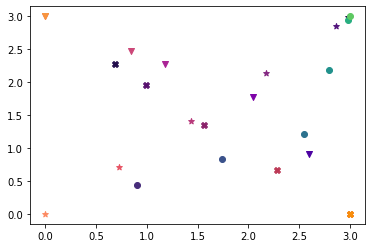

In [ ]:
opt = ADMM()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

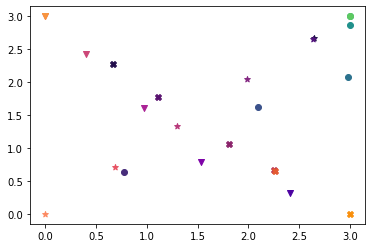

In [ ]:
opt = ADMM()
opt.p = 0.5
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

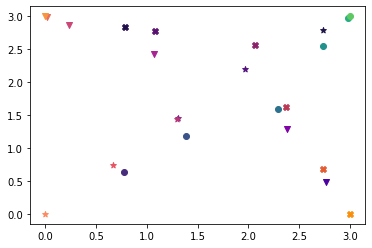

In [ ]:
opt = ADMM()
opt.p = 2
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

In [ ]:
np.save('r3lr2.npy', q)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

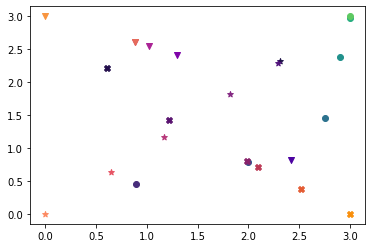

In [ ]:
opt = ADMM()
opt.p = 0.1
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

r
qx0 = ([0,10,0,10])
qy0 = ([0,0,10,10])
qxT = ([10,0,10,0])
qyT = ([10,10,0,0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

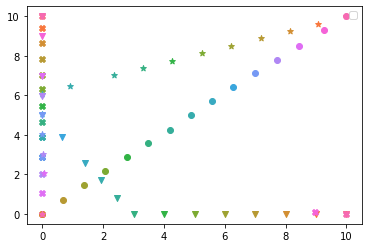

In [ ]:
opt = ADMM()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy)

r2
qx0 = ([0,10,5,5])
qy0 = ([0,10,5,0])
qxT = ([10,0,5,5])
qyT = ([10,0,0,5])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

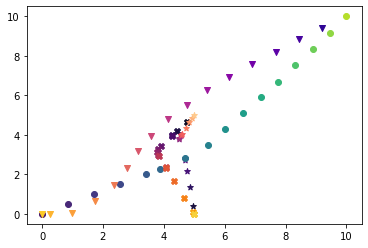

In [ ]:
opt = ADMM()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

r4
qx0 = ([0,10,10,0])
qy0 = ([0,10,0,10])
qxT = ([5,5,5,5])
qyT = ([5,5,5,5])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

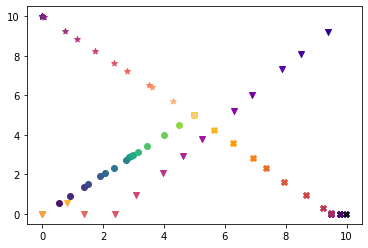

In [ ]:
opt = ADMM()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

r6
qx0 = ([0,10,10,0,5,0])
qy0 = ([0,10,0,10,0,5])
qxT = ([5,5,5,5,5,5])
qyT = ([5,5,5,5,5,5])
        

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

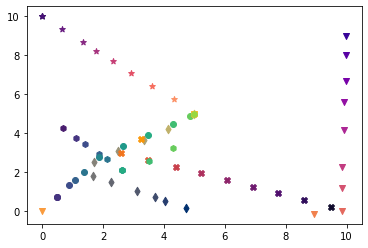

In [ ]:
drawtime(qx,qy,[],[])

In [ ]:
class ADMMPlus():
    def __init__(self):
        self.jMax = 15
        self.qx0 = np.array([0,7,0,7])
        self.qy0 = np.array([0,0,7,7])
        self.qxT = np.array([7,0,7,0])
        self.qyT = np.array([7,7,0,0])
        self.obstacle = np.array([[3.5,3.5]])
        self.goal = np.array([[1.5,3],[6,3]])
        self.landa1 = 1
        self.landa2 = 1
        self.landa3 = 1
        self.p = 1
        self.T = 1
        self.Tconv = 30
        self.p = 1
        self.T = 1
        self.v = 1
        self.nAgent = len(self.qx0)
        self.y = np.ones((self.nAgent,self.nAgent,self.jMax+2))
        self.l = np.ones((self.nAgent,self.jMax+2))
        self.qinit = np.ones((self.nAgent,2*self.jMax))*2
        self.q = np.copy(self.qinit)
        self.index = 0
    def convertTupleToArray(self, q):
        qy = []
        qx = []
        for qn in q:
            qnx = []
            qny = []
            for i in range(len(qn)):
                if i%2 == 0:
                    qnx.append(qn[i])
                else:
                    qny.append(qn[i])
            qx.append(qnx)
            qy.append(qny)
        qx =  np.c_[ self.qx0, qx ] 
        qy =  np.c_[ self.qy0, qy ] 
        qx =  np.c_[ qx, self.qxT ] 
        qy =  np.c_[ qy, self.qyT ] 
        return qx, qy
    def convertTupleToArrayi(self, qi):
        qn = list(qi)
        qy = [self.qx0[self.index]]
        qx = [self.qy0[self.index]]
        for i in range(len(qn)):
            if i%2 == 0:
                qx.append(qn[i])
            else:
                qy.append(qn[i])
        qx.append(self.qxT[self.index])
        qy.append(self.qyT[self.index]) 
        return qx, qy
    def Lp(self,  qi):
        qxi, qyi = self.convertTupleToArrayi(qi)
        qx, qy = self.convertTupleToArray(self.q)
        qx[self.index] = qxi
        qy[self.index] = qyi
        t1 = np.sum([np.sum([sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2) for j in range(self.jMax+1)]) for i in range(self.nAgent)])
        t2 = np.sum([np.sum([np.sum([(self.y[i][k][j]+self.p/2)*max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)) for j in range(self.jMax+2)]) for i in range(self.nAgent)]) for k in range(self.nAgent)])
        t3 = np.sum([np.sum([(self.l[i][j]+self.p/2)*max(0,sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2)-self.v) for j in range(self.jMax+1)]) for i in range(self.nAgent)])
        t4 = (self.landa1+self.p/2)*max(0, self.Tconv - np.sum([[[[sqrt((qx[i][j1]-qx[k][j])**2+(qy[i][j1]-qy[k][j])**2) for j1 in range(self.jMax+2)] for j in range(self.jMax+2)] for i in range(self.nAgent)] for k in range(self.nAgent)]))
        t5 = (self.landa2+self.p/2)*max(0, -1* self.T + np.min([[[sqrt((qx[i][j]-g[0])**2+(qy[i][j]-g[1])**2) for g in self.goal] for j in range(self.jMax+2)] for i in range(self.nAgent)]))
        t6 = (self.landa3+self.p/2)*max(0,   self.T - np.min([[[sqrt((qx[i][j]-g[0])**2+(qy[i][j]-g[1])**2) for g in self.goal] for j in range(self.jMax+2)] for i in range(self.nAgent)]))
        return t1+t2+t3+t4+t5+t6
    def main(self, minimizing = True):
        for epoch in range(10):
            for i in range(len(self.q)):
               self.index = i
               if minimizing:
                  temp = minimize(self.Lp, list(self.q[self.index]), method='Nelder-Mead', tol=1e-6)
                  self.q[self.index] = temp.x
               else:
                  self.q[self.index] = fsolve(self.equations, list(self.q[i]))#np.array([[qx[i][j],qy[i][j]] for j in range(len(qx[i]))]).flatten() 
            qx, qy = self.convertTupleToArray(self.q)
            #print(self.Lp(list(self.q[0])),self.Lp(list(self.q[1])),self.Lp(list(self.q[2])),self.Lp(list(self.q[3])))
            for i in range(self.nAgent):
                for k in range(self.nAgent):
                    for j in range(self.jMax+1):
                        self.y[i][k][j] = self.y[i][k][j] + self.p*(max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)))
                        self.l[i][j] = self.l[i][j] + self.p * max(0,(sqrt((qx[i][j]-qx[i][j+1])**2+(qy[i][j]-qy[i][j+1])**2)-self.v))            
            self.landa1 = self.landa1 +     self.p*  max(0, self.Tconv - np.sum([[[[sqrt((qx[i][j1]-qx[k][j])**2+(qy[i][j1]-qy[k][j])**2) for j1 in range(self.jMax+2)] for j in range(self.jMax+2)] for i in range(self.nAgent)] for k in range(self.nAgent)]))    
            self.landa2 = self.landa2+max(0, -1* self.T + np.min([[[sqrt((qx[i][j]-g[0])**2+(qy[i][j]-g[1])**2) for g in self.goal] for j in range(self.jMax+2)] for i in range(self.nAgent)]))
            self.landa3 = self.landa3+max(0,   self.T - np.min([[[sqrt((qx[i][j]-g[0])**2+(qy[i][j]-g[1])**2) for g in self.goal] for j in range(self.jMax+2)] for i in range(self.nAgent)]))
        return self.q

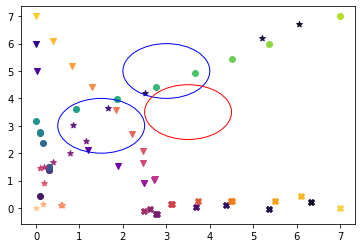

In [ ]:
opt = ADMMPlus()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy, opt.goal, opt.obstacle)

In [ ]:
np.save('qq.npy', q)

In [4]:
import itertools
class Reward():
    def __init__(self, mean, var):
        self.m = mean
        self.var = var
    
    def get_reward(self):
        return np.random.normal(loc=self.m, scale=np.sqrt(self.var))
class ThompsonAgent:
    def __init__(self, qy, qx, y, l, T, v, index, length, nAgent, p, points, start, end, Ts_mean = 0, Ts_var = 1000):
        self.path = []
        self.index = index
        self.l = l
        self.y = y
        self.T =  T
        self.v = v
        self.jMax = length
        self.nAgent = nAgent
        self.p = p
        self.qx = qx
        self.qy = qy
        self.length = length - 2
        temp = []
        for i in range(points):
            for j in range(points):
                temp.append([i,j])
        subset = list(itertools.combinations(temp, length - 2))
        for ss in subset:
            perm = list(itertools.permutations(ss))
            for p in perm:
                self.path.append(list(p))
        arm_count = len(self.path)
        self.Ts_rewards = []
        self.rewards_sum = np.zeros(arm_count)
        self.rewards_count = np.zeros(arm_count)
        self.arm_count = arm_count
        for i in range(arm_count):
            self.Ts_rewards.append(Reward(Ts_mean,Ts_var))
        self.start = start
        self.end = end
    def select_action(self):
        sample = [self.Ts_rewards[i].get_reward() for i in range(self.arm_count)]
        return np.argmax(sample)
    def update_arm(self, Ri, index):
        self.rewards_sum[index] = self.rewards_sum[index] + Ri
        self.rewards_count[index] = self.rewards_count[index] + 1
        tau = 1/self.Ts_rewards[index].var
        self.Ts_rewards[index].m = (self.Ts_rewards[index].m * tau + self.rewards_sum[index])/ (self.rewards_count[index] + tau)
        tau = tau + 1
        self.Ts_rewards[index].var = 1/tau
    def take_action(self):
        index_selected_arm = self.select_action()
        path = self.path[index_selected_arm]
        path.insert(0,self.start)
        path.append(self.end)
        t1 = np.sum([sqrt((path[j][0]-path[j+1][0])**2+(path[j][1]-path[j+1][1])**2) for j in range(len(path)-1)])
        t3 = np.sum([(self.l[self.index][j]+self.p/2)*max(0,sqrt((path[j][0]-path[j+1][0])**2+(path[j][1]-path[j+1][1])**2)-self.v) for j in range(len(path)-1)])
        t2 = 0
        for j in range(len(path)):
            for i in range(len(self.qx)):
                t2 += (self.y[self.index][i][j]+self.p/2)*max(0,self.T-sqrt((path[j][0]-self.qx[i][j])**2+(path[j][1]-self.qy[i][j])**2))
        Ri = -t1-t2-t3
        self.update_arm(Ri, index_selected_arm)
        return  path
class greedyAgent:
    def __init__(self, qy, qx, y, l, T, v, index, length, nAgent, p, points, start, end):
        self.path = []
        self.index = index
        self.l = l
        self.y = y
        self.T =  T
        self.v = v
        self.jMax = length
        self.nAgent = nAgent
        self.p = p
        self.qx = qx
        self.qy = qy
        self.length = length - 2
        temp = []
        for i in range(points):
            for j in range(points):
                temp.append([i,j])
        subset = list(itertools.combinations(temp, length - 2))
        for ss in subset:
            perm = list(itertools.permutations(ss))
            for p in perm:
                self.path.append(list(p))
        arm_count = len(self.path)
        self.arm_count = arm_count
        self.k = arm_count
        # Step count for each arm
        self.k_n = np.zeros(self.k)
        # Total mean reward
        self.mean_reward = 0
        # Mean reward for each arm
        self.k_reward = np.zeros(self.k)
    def select_action(self):
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            return np.random.choice(self.k)
        else:
            return np.argmax(self.k_reward)
    
    
    def take_action(self):
        index_selected_arm = self.select_action()
        path = self.path[index_selected_arm]
        path.insert(0,self.start)
        path.append(self.end)
        t1 = np.sum([sqrt((path[j][0]-path[j+1][0])**2+(path[j][1]-path[j+1][1])**2) for j in range(len(path)-1)])
        t3 = np.sum([(self.l[self.index][j]+self.p/2)*max(0,sqrt((path[j][0]-path[j+1][0])**2+(path[j][1]-path[j+1][1])**2)-self.v) for j in range(len(path)-1)])
        t2 = 0
        for j in range(len(path)):
            for i in range(len(self.qx)):
                t2 += (self.y[self.index][i][j]+self.p/2)*max(0,self.T-sqrt((path[j][0]-self.qx[i][j])**2+(path[j][1]-self.qy[i][j])**2))
        Ri = -t1-t2-t3
        self.update_arm(Ri, index_selected_arm)
        return  path
    def update_arm(self, Ri, index_selected_arm):
        self.n += 1
        self.k_n[index_selected_arm] += 1
        self.mean_reward = self.mean_reward + (Ri - self.mean_reward) / self.n
        self.k_reward[index_selected_arm] = self.k_reward[index_selected_arm] + (Ri - self.k_reward[index_selected_arm]) / self.k_n[index_selected_arm]

class ADMMRL():
    def __init__(self):
        self.jMax = 6
        self.qx0 = np.array([0,3,0,3])
        self.qy0 = np.array([0,0,3,3])
        self.qxT = np.array([3,0,3,0])
        self.qyT = np.array([3,3,0,0])
        self.p = 1
        self.T = 1
        self.v = 1
        self.nAgent = 4
        self.y = np.ones((self.nAgent,self.nAgent,self.jMax+2))
        self.l = np.ones((self.nAgent,self.jMax+2))
        self.qinit = np.ones((self.nAgent,2*self.jMax))*2
        self.q = np.copy(self.qinit)
        self.index = 0
    def convertTupleToArray(self, q):
        qy = []
        qx = []
        for qn in q:
            qnx = []
            qny = []
            for i in range(len(qn)):
                if i%2 == 0:
                    qnx.append(qn[i])
                else:
                    qny.append(qn[i])
            qx.append(qnx)
            qy.append(qny)
        qx =  np.c_[ self.qx0, qx ] 
        qy =  np.c_[ self.qy0, qy ] 
        qx =  np.c_[ qx, self.qxT ] 
        qy =  np.c_[ qy, self.qyT ] 
        return qx, qy
    def convertTupleToArrayi(self, qi):
        qn = list(qi)
        qy = [self.qx0[self.index]]
        qx = [self.qy0[self.index]]
        for i in range(len(qn)):
            if i%2 == 0:
                qx.append(qn[i])
            else:
                qy.append(qn[i])
        qx.append(self.qxT[self.index])
        qy.append(self.qyT[self.index]) 
        return qx, qy
    def RL(self, index ):
        qx, qy = self.convertTupleToArray(self.q)
        agent = ThompsonAgent(qy, qx, self.y, self.l, self.T, self.v, index, self.jMax, self.nAgent, self.p, 6,  [self.qx0[index],self.qy0[index]], [self.qxT[index],self.qyT[index]])
        for i in range(1000):
            agent.take_action()
        qi = agent.take_action()
        return list(np.array(qi).flatten())
    def main(self):
        for i in range(20):
            for i in range(len(self.q)):
               self.index = i
               self.q[self.index] = self.RL(self.index)
            qx, qy = self.convertTupleToArray(self.q)
            for i in range(self.nAgent):
                for k in range(self.nAgent):
                    for j in range(self.jMax):
                        self.y[i][k][j] = self.y[i][k][j] + self.p*(max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)))
                        self.l[i][j] = self.l[i][j] + self.p * max(0,(sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2)-self.v))            
        return self.q

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

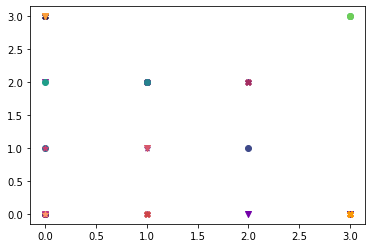

In [ ]:
opt = ADMMRL()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

In [ ]:
np.save('rl1.npy', q)

In [ ]:
import random
class Agent_DQlearning():
    def __init__(self,  T,action_count = 9, alpha = 0, epsilon = 0):
        state = []
        for i in range(11):
            for j in range(11):
                state.append([i,j])
        self.alpha = alpha
        self.mapper = {}
        for i in range(len(state)):
            self.mapper[str(state[i][0])+","+str(state[i][1])] = i
        self.T = T
        self.inversmapper = state
        state_count = len(state)
        self.QA_sa = np.zeros((action_count,state_count))
        self.QB_sa = np.zeros((action_count,state_count))
        
        self.action_count = action_count
        self.state_count = state_count
        self.epsilon = epsilon
        self.R_avg = []
        self.R_sum = []
        if epsilon == 0:
            self.change_epsilon = True
        else:
            self.change_epsilon = False
            self.epsilon = epsilon
        if alpha == 0:
            self.change_alpha = True
        else:
            self.change_alpha = False
            self.alpha = alpha
    
    def main_loop(self,qx, qy, index, state, y, goal, length):
        gama = 0.99
        state = self.mapper[str(state[0])+","+str(state[1])]
        for k in range(3000):
            if self.change_epsilon:
                self.epsilon = 100/(100+k)
            if self.change_alpha:
                self.alpha = 100/(1000+k)
            R = []
            result = []
            for l in range(length):
                result.append(self.inversmapper[state][0])
                result.append(self.inversmapper[state][1])
                p = random.random()
                #select action
                if p< 1-self.epsilon:
                    action = np.argmax([self.QA_sa[i][state]+self.QB_sa[i][state] for i in range(self.action_count)])
                else:
                    action = np.random.choice([i for i in range(self.action_count)])
                state_p, reward, done = self.take_action(state,action,qx, index, qy, y, goal,l, length)
                p = random.random()
                A_star = np.argmax([self.QA_sa[i][state_p] for i in range(self.action_count)])
                if p<0.5:
                    A_star = np.argmax([self.QA_sa[i][state_p] for i in range(self.action_count)])
                    self.QA_sa[action][state] = self.QA_sa[action][state] + self.alpha*(reward+gama*self.QB_sa[A_star][state_p] - self.QA_sa[action][state] )
                    
                else:
                    A_star = np.argmax([self.QB_sa[i][state_p] for i in range(self.action_count)])
                    self.QB_sa[action][state] = self.QB_sa[action][state] + self.alpha*(reward+gama*self.QA_sa[A_star][state_p] - self.QB_sa[action][state] )
                state = state_p    
                if done:
                    break
                
    def take_action(self, state,action,qx, inedx, qy, y, goal, l, length) -> (object, float, bool, object):
        s = self.inversmapper[state]
        a = {0:[0,0],1:[1,0],2:[0,1],3:[1,1],4:[-1,0],5:[0,-1],6:[-1,-1],7:[1,-1],8:[-1,1]}
        sp = np.array(s)+a[action]
        p = 1
        R = -1*np.sum([[(y[inedx][i][j]+p/2)*max(0,self.T-sqrt((sp[0]-qx[i][j])**2+(sp[1]-qy[i][j])**2)) for i in range(len(qx))] for j in range(len(qx[0]))])
        done = False
        if l == length-1:
            R = R - 10*sqrt((sp[0]-goal[0])**2+(sp[1]-goal[1])**2)
            done = True
        if sp[0]<0:
            sp[0] = 0
        if sp[1] <0:
            sp[1] = 0
        if sp[0]>10 :
            sp[0] = 10
        if sp[1] >10:
            sp[1] = 10
        #R = R - sqrt(a[action][0]**2+a[action][1]**2)
        return self.mapper[str(sp[0])+","+str(sp[1])], R, done
    def get_traj(self,qx, qy, index, state, y, goal, length):
        t = [state]
        state = self.mapper[str(state[0])+","+str(state[1])]
        for l in range(length):
            action = np.argmax([self.QA_sa[i][state]+self.QB_sa[i][state] for i in range(self.action_count)])
            s = self.inversmapper[state]
            a = {0:[0,0],1:[1,0],2:[0,1],3:[1,1],4:[-1,0],5:[0,-1],6:[-1,-1],7:[1,-1],8:[-1,1]}
            sp = np.array(s)+a[action]
            if sp[0]<0:
                sp[0] = 0
            if sp[1] <0:
                sp[1] = 0
            if sp[0]>10 :
                sp[0] = 10
            if sp[1] >10:
                sp[1] = 10
            t.append(sp)
            state = self.mapper[str(sp[0])+","+str(sp[1])]
        t.append(goal)
        return list(np.array(t).flatten())

class ADMMRL():
    def __init__(self):
        self.jMax = 15
        self.qx0 = np.array([0,10,0,10])
        self.qy0 = np.array([0,0,10,10])
        self.qxT = np.array([10,0,10,0])
        self.qyT = np.array([10,10,0,0])
        self.p = 1
        self.T = 1
        self.v = 1
        self.nAgent = 4
        self.y = np.ones((self.nAgent,self.nAgent,self.jMax+2))
        self.l = np.ones((self.nAgent,self.jMax+2))
        self.qinit = np.ones((self.nAgent,2*self.jMax))*2
        self.q = np.copy(self.qinit)
        self.index = 0
    def convertTupleToArray(self, q):
        qy = []
        qx = []
        for qn in q:
            qnx = []
            qny = []
            for i in range(len(qn)):
                if i%2 == 0:
                    qnx.append(qn[i])
                else:
                    qny.append(qn[i])
            qx.append(qnx)
            qy.append(qny)
        qx =  np.c_[ self.qx0, qx ] 
        qy =  np.c_[ self.qy0, qy ] 
        qx =  np.c_[ qx, self.qxT ] 
        qy =  np.c_[ qy, self.qyT ] 
        return qx, qy
    def convertTupleToArrayi(self, qi):
        qn = list(qi)
        qy = [self.qx0[self.index]]
        qx = [self.qy0[self.index]]
        for i in range(len(qn)):
            if i%2 == 0:
                qx.append(qn[i])
            else:
                qy.append(qn[i])
        qx.append(self.qxT[self.index])
        qy.append(self.qyT[self.index]) 
        return qx, qy
    def Lp(self,  qi):
        qxi, qyi = self.convertTupleToArrayi(qi)
        qx, qy = self.convertTupleToArray(self.q)
        qx[self.index] = qxi
        qy[self.index] = qyi
        t1 = np.sum([np.sum([sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2) for j in range(self.jMax+2)]) for i in range(self.nAgent)])
        t2 = np.sum([np.sum([np.sum([(self.y[i][k][j]+self.p/2)*max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)) for j in range(self.jMax+2)]) for i in range(self.nAgent)]) for k in range(self.nAgent)])
        t3 = np.sum([np.sum([(self.l[i][j]+self.p/2)*max(0,sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2)-self.v) for j in range(self.jMax+2)]) for i in range(self.nAgent)])
        return t1+t2+t3
    def RL(self, qi , index ):
        agent = Agent_DQlearning(self.T)
        qx, qy = self.convertTupleToArray(self.q)
        agent.main_loop(qx, qy, index, [self.qx0[index],self.qy0[index]], self.y,[self.qxT[index],self.qyT[index]],self.jMax-2)
        return agent.get_traj(qx, qy, index, [self.qx0[index],self.qy0[index]], self.y,[self.qxT[index],self.qyT[index]],self.jMax-2)
    def main(self):
        for i in range(10):
            for i in range(len(self.q)):
               self.index = i
               self.q[self.index] = self.RL(self.q[self.index],self.index)
            qx, qy = self.convertTupleToArray(self.q)
            for i in range(self.nAgent):
                for k in range(self.nAgent):
                    for j in range(self.jMax):
                        self.y[i][k][j] = self.y[i][k][j] + self.p*(max(0,self.T-sqrt((qx[i][j]-qx[k][j])**2+(qy[i][j]-qy[k][j])**2)))
                        self.l[i][j] = self.l[i][j] + self.p * max(0,(sqrt((qx[i][j]-qx[i][j-1])**2+(qy[i][j]-qy[i][j-1])**2)-self.v))            
        return self.q

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

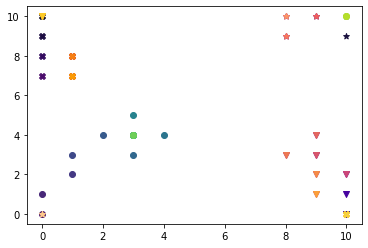

In [ ]:
opt = ADMMRL()
q = opt.main()
qx, qy = opt.convertTupleToArray(q)
drawtime(qx,qy,[],[])

In [ ]:
np.save('rl2.npy', q) 